In [1]:
pip install Nasdaq-Data-Link

Note: you may need to restart the kernel to use updated packages.


In [9]:
import nasdaqdatalink as ndl

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [27]:
# Set your API key
ndl.ApiConfig.api_key = "9YWun_MoLoMF_LsJcWJa"

In [55]:
df = pd.read_csv(r"C:\Users\gkgiz\Downloads\WB_DATA_d950d0cd269a601150c0afd03b234ee2\WB_DATA_d950d0cd269a601150c0afd03b234ee2.csv")

In [64]:
df.head()

,series_id,country_code,country_name,year,value
0,SP.POP.DPND,LCN,Latin America & Caribbean,2003,58.587811
1,SP.POP.DPND,LDC,Least developed countries: UN classification,2003,86.452374
2,SP.POP.DPND,LIC,Low income,2003,93.776093
3,SP.POP.DPND,LIE,Liechtenstein,2003,40.606261
4,SP.POP.DPND,LKA,Sri Lanka,2003,50.005545


In [272]:
usa_data = df[df['country_name'] == 'United States']
#I am choosing the general employment rate in the USA from this dataset, since this is the closest connection I could find to my student achievement project, which is about absenteeism rates.

KeyError: 'country_name'

In [68]:
usa_data.to_csv('usa_data.csv', index=False)

In [76]:
usa_data.head()

,series_id,country_code,country_name,year,value
107,SP.POP.DPND,USA,United States,2003,49.858383
422,SP.POP.DPND,USA,United States,2004,49.522142
681,SP.POP.DPND,USA,United States,2005,49.189346
992,SP.POP.DPND,USA,United States,2006,48.901619
1308,SP.POP.DPND,USA,United States,2007,48.749792


In [80]:
usa_data.set_index('year', inplace=True)

In [82]:
usa_data.head()

,series_id,country_code,country_name,value
year,,,,
2003,SP.POP.DPND,USA,United States,49.858383
2004,SP.POP.DPND,USA,United States,49.522142
2005,SP.POP.DPND,USA,United States,49.189346
2006,SP.POP.DPND,USA,United States,48.901619
2007,SP.POP.DPND,USA,United States,48.749792


In [94]:
usa_data.index = pd.to_datetime(usa_data.index.astype(str) + '-01-01')

# Display the updated DataFrame
print("\nUpdated DataFrame with datetime index:")
print(usa_data)


Updated DataFrame with datetime index:
                 series_id country_code   country_name      value
year                                                             
2003-01-01     SP.POP.DPND          USA  United States  49.858383
2004-01-01     SP.POP.DPND          USA  United States  49.522142
2005-01-01     SP.POP.DPND          USA  United States  49.189346
2006-01-01     SP.POP.DPND          USA  United States  48.901619
2007-01-01     SP.POP.DPND          USA  United States  48.749792
...                    ...          ...            ...        ...
1984-01-01  GC.TAX.YPKG.ZS          USA  United States  86.670242
1985-01-01  GC.TAX.YPKG.ZS          USA  United States  87.910868
1986-01-01  GC.TAX.YPKG.ZS          USA  United States  88.586898
1987-01-01  GC.TAX.YPKG.ZS          USA  United States  89.678135
1988-01-01  GC.TAX.YPKG.ZS          USA  United States  89.330450

[43490 rows x 4 columns]


In [102]:
data.columns

Index(['series_id', 'country_code', 'country_name', 'year', 'value'], dtype='object')

In [206]:
filtered_data = usa_data[usa_data['series_id'] == 'SP.POP.DPND']
# filtering the data specifically for the value regarding employment rate

In [172]:
df = filtered_data.drop(['series_id','country_code','country_name'], axis=1)

In [174]:
df.head

<bound method NDFrame.head of                 value
year                 
2003-01-01  49.858383
2004-01-01  49.522142
2005-01-01  49.189346
2006-01-01  48.901619
2007-01-01  48.749792
...               ...
1999-01-01  51.335564
2001-01-01  50.562259
1960-01-01  66.793151
2000-01-01  50.927526
2002-01-01  50.211935

[64 rows x 1 columns]>

In [176]:
df.columns

Index(['value'], dtype='object')

In [178]:
type(data)

pandas.core.frame.DataFrame

In [180]:
print(df.head(1000))

                value
year                 
2003-01-01  49.858383
2004-01-01  49.522142
2005-01-01  49.189346
2006-01-01  48.901619
2007-01-01  48.749792
...               ...
1999-01-01  51.335564
2001-01-01  50.562259
1960-01-01  66.793151
2000-01-01  50.927526
2002-01-01  50.211935

[64 rows x 1 columns]


In [182]:
print(df.isnull().sum())


value    0
dtype: int64


In [184]:
data_2 = df.reset_index()

In [186]:
data_2.head()

,year,value
0,2003-01-01,49.858383
1,2004-01-01,49.522142
2,2005-01-01,49.189346
3,2006-01-01,48.901619
4,2007-01-01,48.749792


I filtered the data for the last 20 years because I thought it could be interesting to look at the trend in the last 20 years. It is a bit of an arbitrary choice, if I am being honest.

In [224]:
data_sub = data_2.loc[(data_2['year'] >= '2004-01-01') & (data_2['year'] < '2024-01-01')]

In [242]:
data_sub.shape

(20, 1)

In [246]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['year']) # Create a datetime column from "Year.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['year'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

KeyError: 'year'

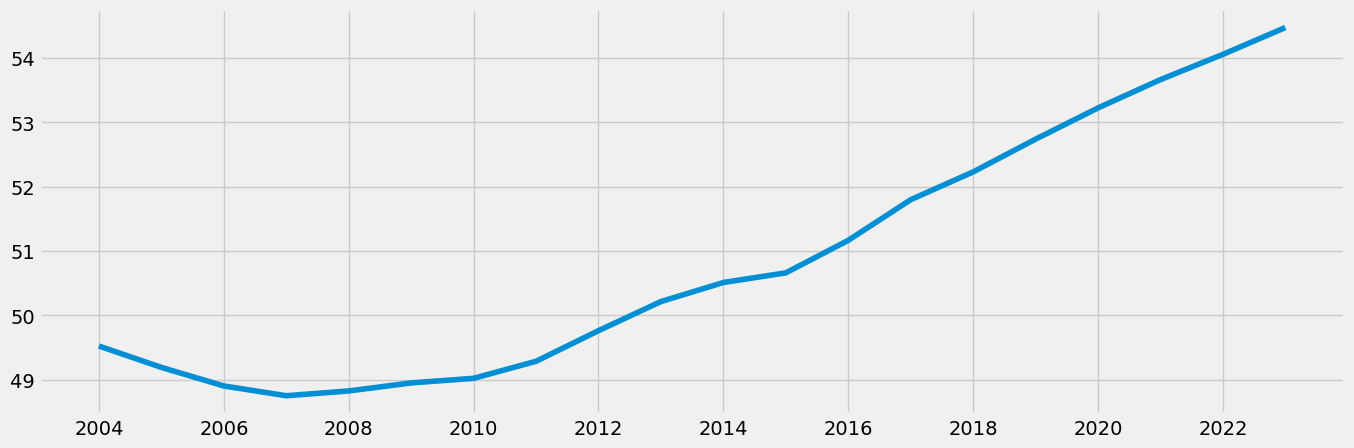

In [230]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [275]:
# Check for missing values 

data_sub.isnull().sum()

value    0
dtype: int64

In [277]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

In [236]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [238]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

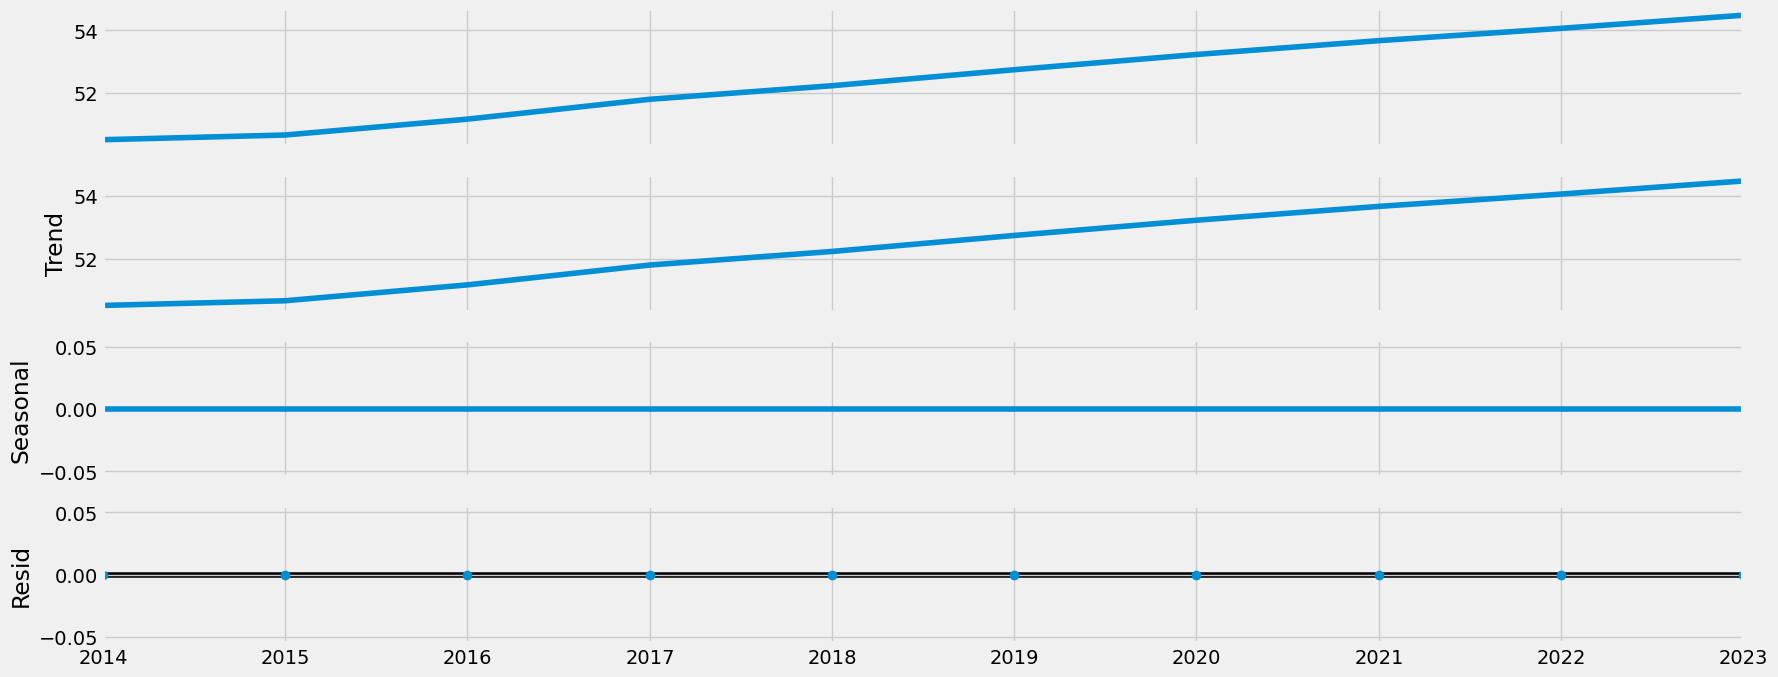

In [222]:
# Plot the separate components

decomposition.plot()
plt.show()

There is no seasonality and no noise, but there is a slight upwards trend, which is indicative of non-stationary data.

In [250]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.721518
p-value                         0.990258
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


Test statistic larger than critical value = can’t reject null hypothesis
Test statistic smaller than critical value = can reject null hypothesis

My null hypothesis is the presence of a unit root, which is any random jump that can’t be explained by variation in the data—in other words, a jump that’s not constant.

The test statistic here is much bigger than any critical values and my data also has a trend, which shows me that it is non-stationary.

In [253]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [255]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [257]:
data_diff.head()

,value
datetime,
2005-01-01,-0.332796
2006-01-01,-0.287727
2007-01-01,-0.151827
2008-01-01,0.074279
2009-01-01,0.125211


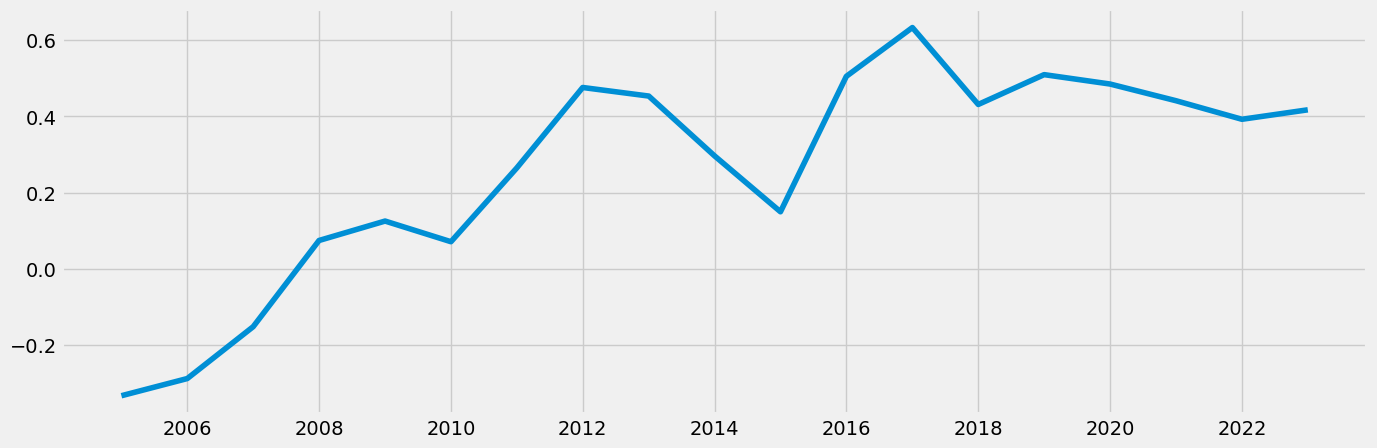

In [259]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [261]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.058235
p-value                         0.029802
Number of Lags Used             7.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


With the test statistics being smaller than critical value at 10%, and the p-value being smaller than 0.05, we can say that now the data is stationary!

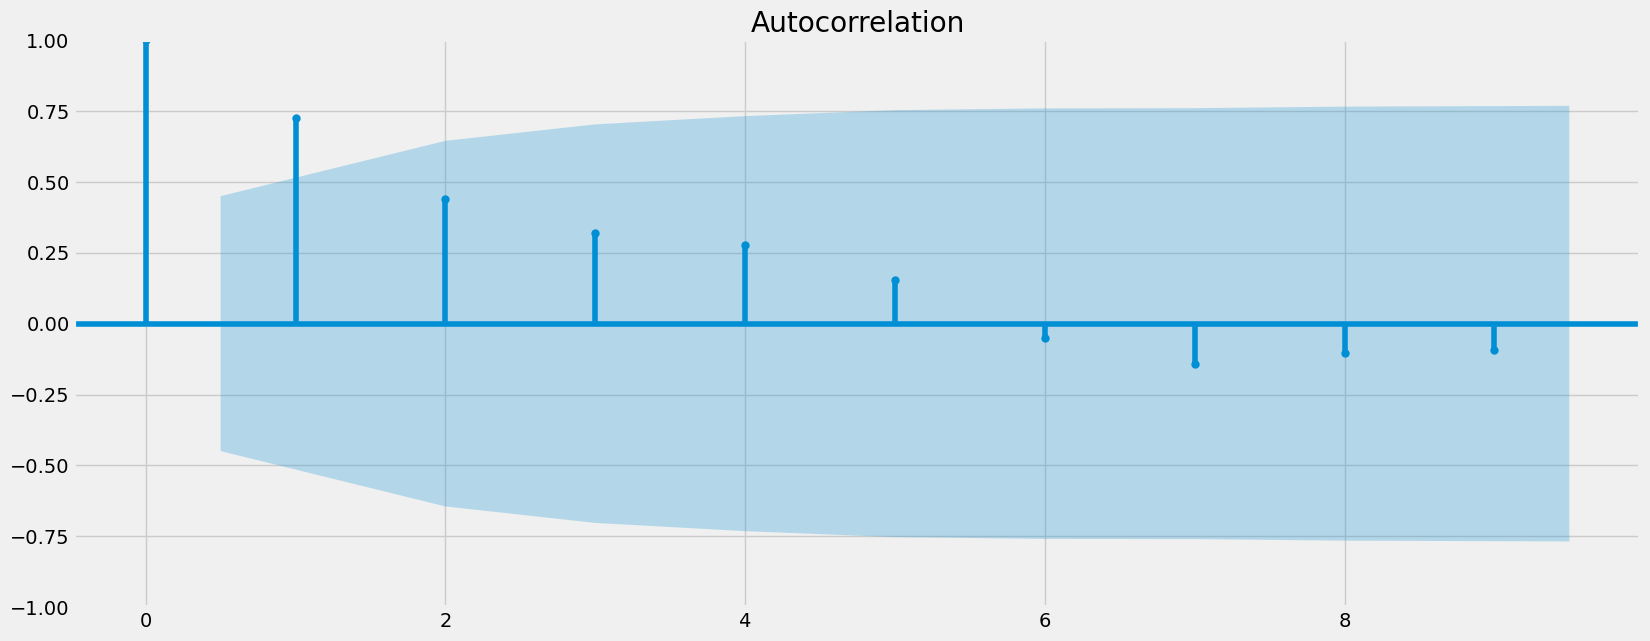

In [266]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

# Check for autocorrelation

I don't have so many lags that go beyond the confidence interval, so the data is now surely stationary!